# Observed generalized Taylor law
**in protein length distributions for the different species (reference proteomes)**

## Import python modules

In [1]:
import numpy as np
from scipy import stats
import pandas as pd
#
from plotnine import *
if 1:
    import warnings
    warnings.filterwarnings('ignore')
import sys
sys.path.append('../../gl_lib/')
import gl_constants as gl_c
import gl_plot as gl_p

## The protein length distributions for the different species

### Retrieving the statistical descriptions of the length's distributions

In [2]:
# statistics on length distribution for different species 
stat_file = gl_c.STAT_P_FILE
if 0:
     print("The statistical descriptions of the protein distributions for the different species is in:\n",\
          stat_file, "\n")
# retrieve data and diminish the number of columns
stat_df = pd.read_csv(stat_file, low_memory=False, sep="\t")
stat_df = stat_df[["superregnum", "species", "proteome_id", "count", "mean", "var", "division_both_dbs"]]
stat_df.rename(columns = {"division_both_dbs": 'Group of organisms',
                          "superregnum": "Three-domain system"}, inplace = True)
stat_df["2nd_order_momentum"] = stat_df["var"] +  stat_df["mean"]**2 

# visualize data
if 1:
    pd.set_option('display.max_columns', len(stat_df.columns))
    display(stat_df.sample(2))
    print(stat_df.shape)
    print(stat_df["Three-domain system"].value_counts(), "\n")
    print(stat_df["Group of organisms"].value_counts())

,Three-domain system,species,proteome_id,count,mean,var,Group of organisms,2nd_order_momentum
52,archaea,Haloquadratum walsbyi (strain DSM 16790 / HBSQ...,UP000001975,2558.0,301.882721,79756.866960,archaea,170890.044123
596,bacteria,Rhodovulum sulfidophilum (Rhodobacter sulfidop...,UP000064912,4359.0,309.800872,59444.673051,bacteria,155421.253194


(9913, 8)
Three-domain system
bacteria     7997
eukaryota    1586
archaea       330
Name: count, dtype: int64 

Group of organisms
bacteria         7997
fungi             772
archaea           330
vertebrates       248
invertebrates     226
plants            184
protists          156
Name: count, dtype: int64


## Scaling law (represented in $log_{10}$ scale)
## Protein coding gene length distributions  
### by kingdom
$\sigma^{2}$ is the variance   
$\mu$ is the mean 

In [3]:
df2plot = stat_df.copy()
df2plot.rename(columns = {"mean" : 'prots_mean', 
                          "var" : 'prots_var'}, inplace = True)

col_x = "prots_mean"
col_y = "2nd_order_momentum"
df2plot = df2plot[["Three-domain system", "Group of organisms", col_x, col_y]]
print(df2plot.shape)
title = "Protein length (reference proteomes)"
x_lab = "Mean protein length (aa)"
y_lab = "Second order raw momentum ($\sigma^{2} + \mu^{2}$)"
bool_show_regression = True
bool_proteins = True

(9913, 4)


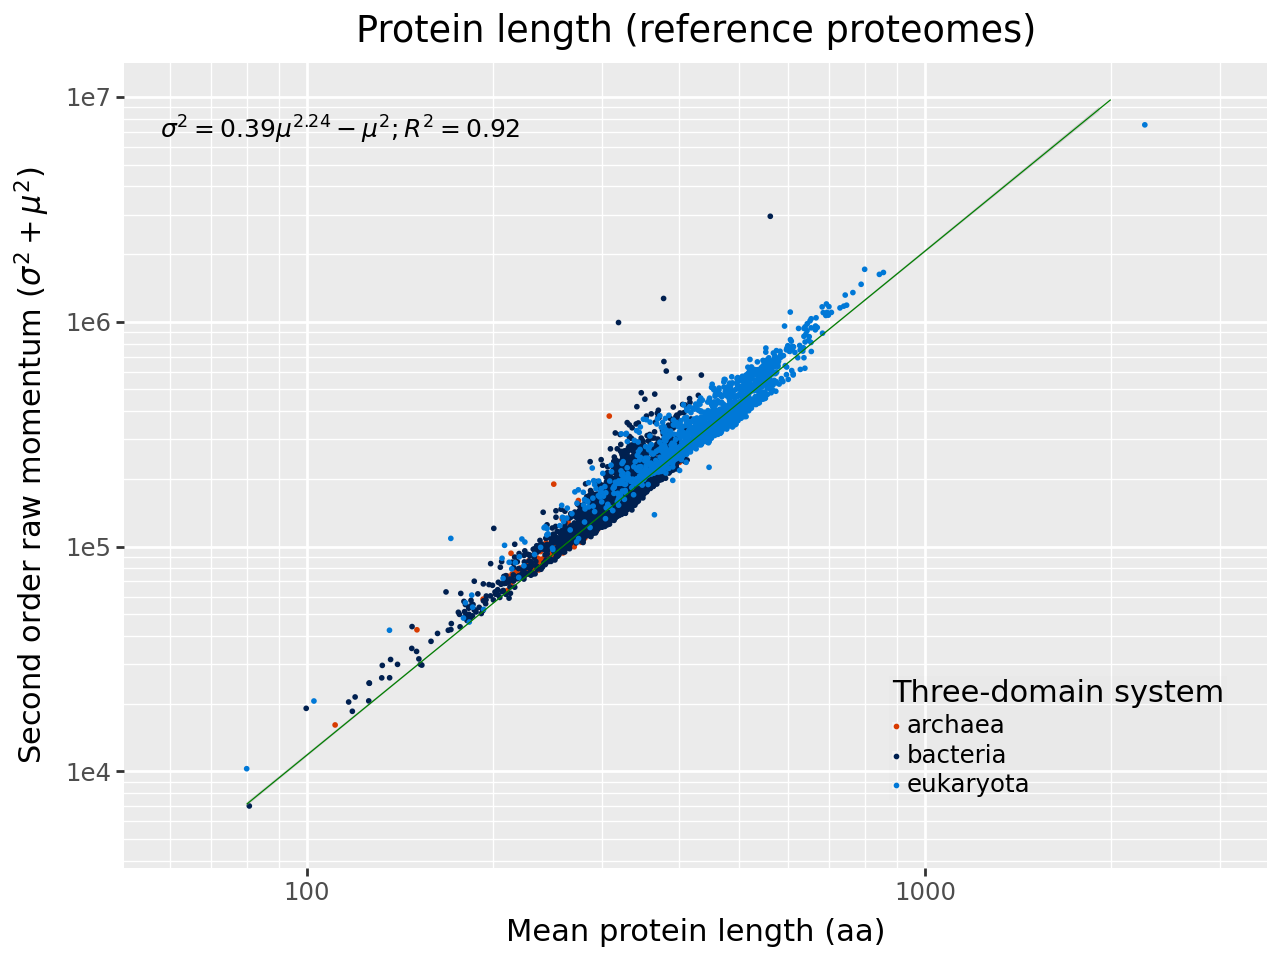

In [4]:
legends_by = "Three-domain system"
legends_label = "Three-domain system"

# Sort legends: clades in an order
df2plot[legends_by] = pd.Categorical(df2plot[legends_by], 
                                categories=gl_c.ORG_KINGDOMS,
                                ordered=True)
df2plot.sort_values(legends_by, inplace=True)

gl_p.plot_momentum(df2plot, col_x, col_y, x_lab, y_lab, title, legends_by, legends_label, \
    bool_show_regression, bool_proteins)

### by group of organisms

(9913, 4)
Group of organisms
bacteria         7997
fungi             772
archaea           330
vertebrates       248
invertebrates     226
plants            184
protists          156
Name: count, dtype: int64


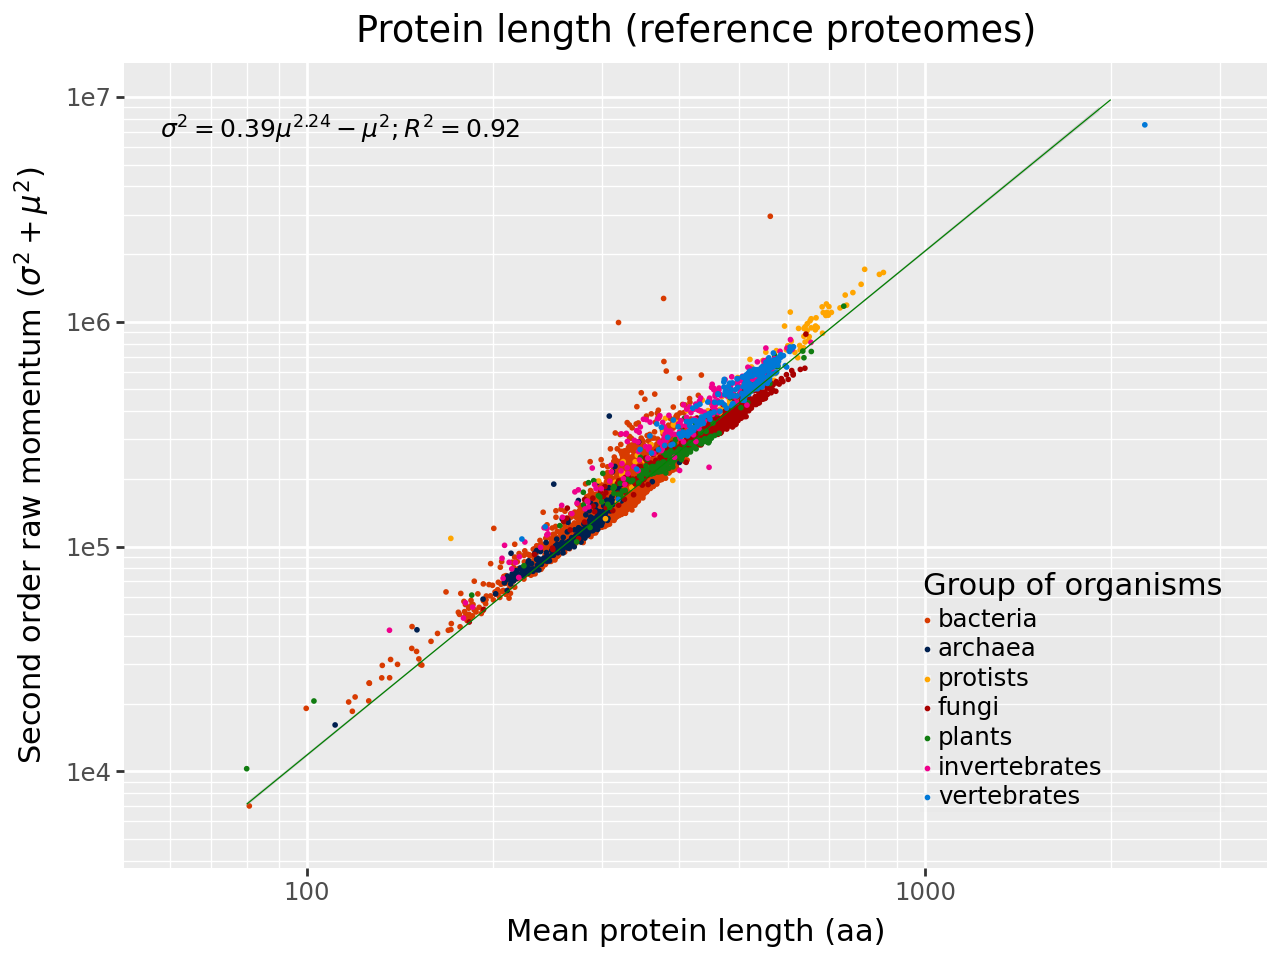

In [5]:
legends_by    = "Group of organisms"
legends_label = "Group of organisms"
print(df2plot.shape)

# Sort legends: clades in an order
df2plot[legends_by] = pd.Categorical(df2plot[legends_by], 
                                    categories=gl_c.ORG_GROUPS,
                                    ordered=True)
df2plot.sort_values(legends_by, inplace=True)

# visualize data
if 1:
    print(stat_df["Group of organisms"].value_counts())
gl_p.plot_momentum(df2plot, col_x, col_y, x_lab, y_lab, title, legends_by, legends_label, \
    bool_show_regression, bool_proteins)

#### Note:  
$\sigma^{2} = a . \mu^{\beta}$   
Because the regression line is:  
$\log(\sigma^{2}) = \log(a) + \beta log(\mu) $